In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
data = pd.read_csv("datasets/banking-campaign.csv")

data.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


#### Data discovery

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [60]:
# null values percentage per column

(data.isnull().sum()/data.shape[0]) * 100

id                                   0.000000
customer_age                         1.955952
job_type                             0.000000
marital                              0.473979
education                            0.000000
default                              0.000000
balance                              1.260783
housing_loan                         0.000000
personal_loan                        0.470819
communication_type                   0.000000
day_of_month                         0.000000
month                                0.000000
last_contact_duration                0.982716
num_contacts_in_campaign             0.353904
days_since_prev_campaign_contact    81.622271
num_contacts_prev_campaign           0.000000
prev_campaign_outcome                0.000000
term_deposit_subscribed              0.000000
dtype: float64

In [61]:
data.nunique()

id                                  31647
customer_age                           77
job_type                               12
marital                                 3
education                               4
default                                 2
balance                              6563
housing_loan                            2
personal_loan                           2
communication_type                      3
day_of_month                           31
month                                  12
last_contact_duration                1447
num_contacts_in_campaign               46
days_since_prev_campaign_contact      511
num_contacts_prev_campaign             41
prev_campaign_outcome                   4
term_deposit_subscribed                 2
dtype: int64

In [62]:
data.duplicated().sum()

0

#### Date Analyze

##### Get categorical columns

In [63]:
# iterate columns excluding the first one

categorical_columns = [data.columns[i] for i in range(1, data.shape[1] - 1) if data.iloc[:, i].dtype == "O"]

categorical_columns

['job_type',
 'marital',
 'education',
 'default',
 'housing_loan',
 'personal_loan',
 'communication_type',
 'month',
 'prev_campaign_outcome']

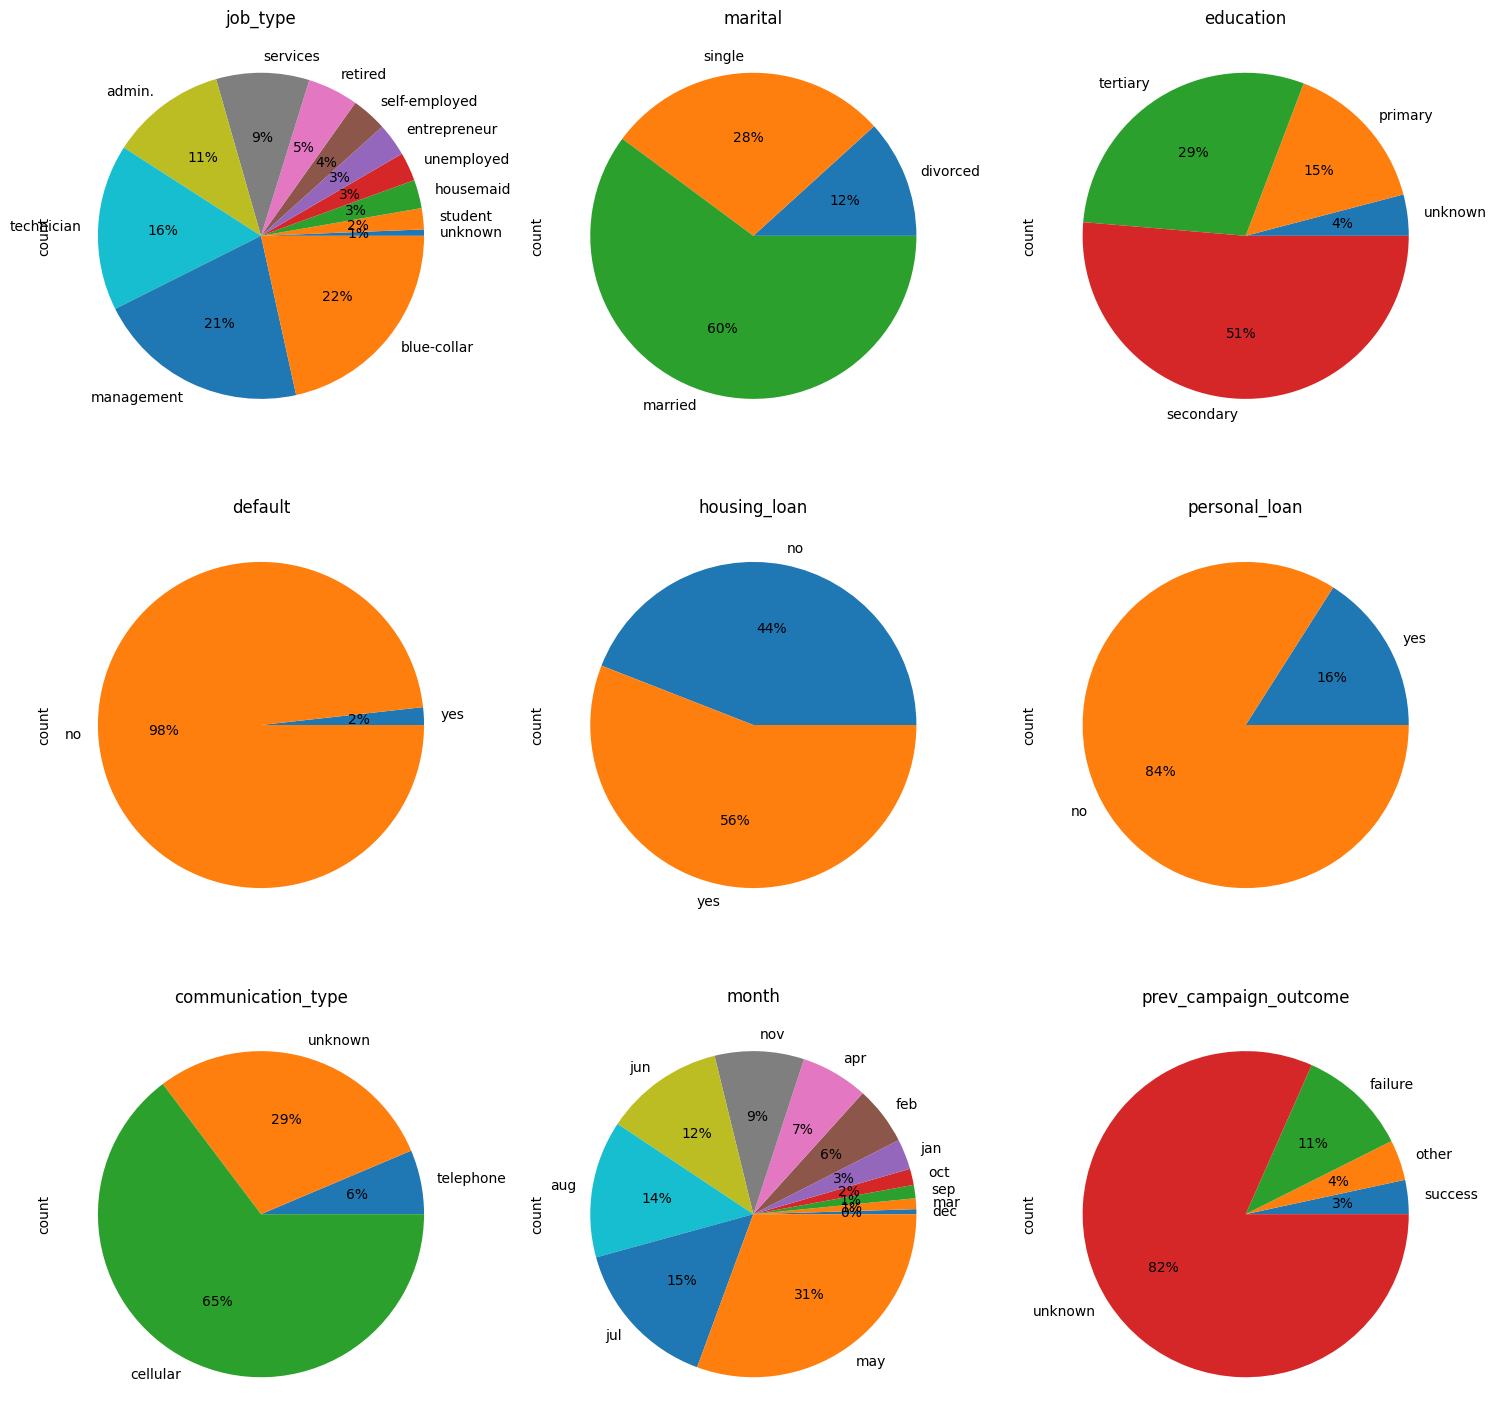

In [64]:
figure, axes = plt.subplots(3, 3, figsize = (18, 18))

# generate 10*1 array from 3*3
axes = [axis for axes_rows in axes for axis in axes_rows]

for i, column in enumerate(data[categorical_columns]):
  data[column].value_counts()[::-1].plot(kind = "pie", ax = axes[i], title = column, autopct = "%.0f%%")

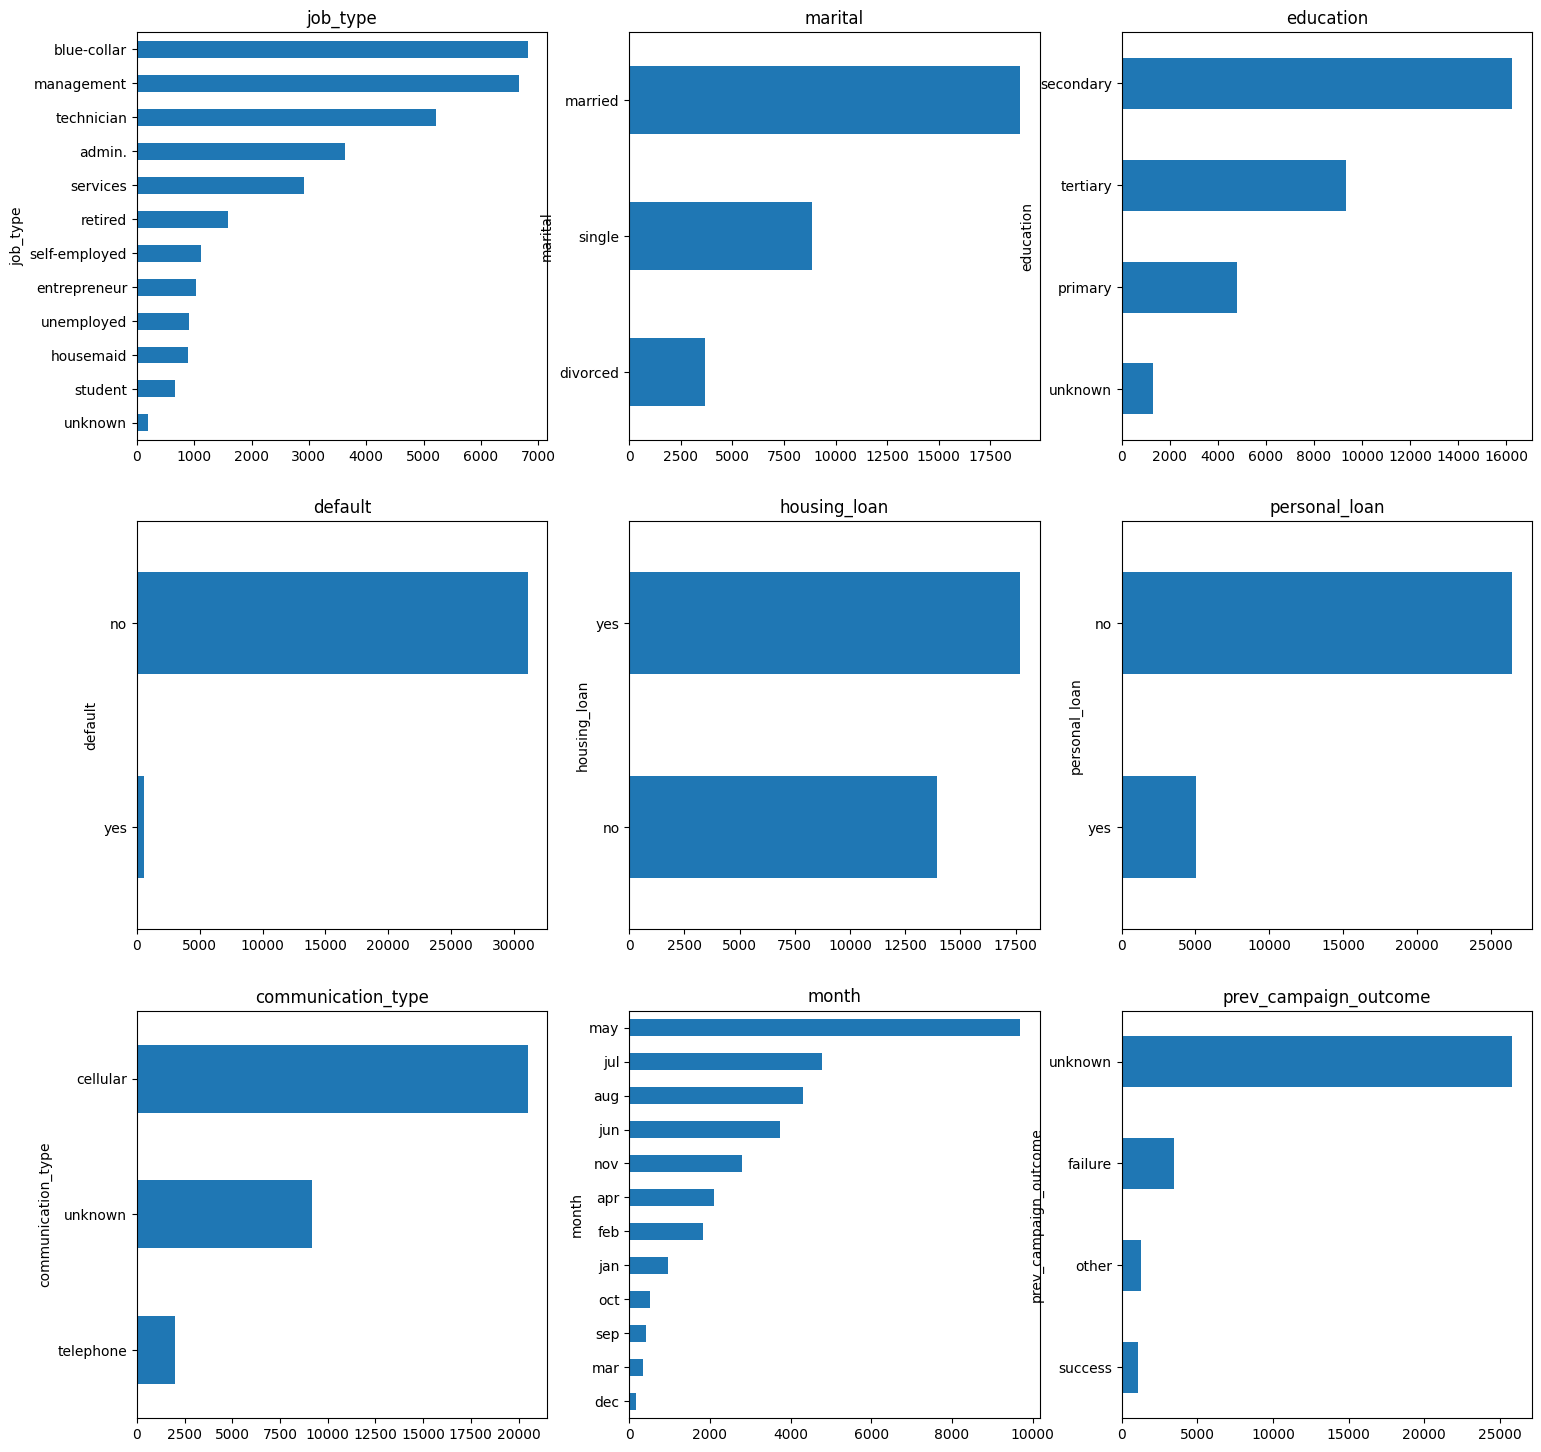

In [65]:
figure, axes = plt.subplots(3, 3, figsize = (18, 18))

# generate 10*1 array from 3*3
axes = [axis for axes_rows in axes for axis in axes_rows]

for i, column in enumerate(data[categorical_columns]):
  data[column].value_counts()[::-1].plot(kind = "barh", ax = axes[i], title = column)

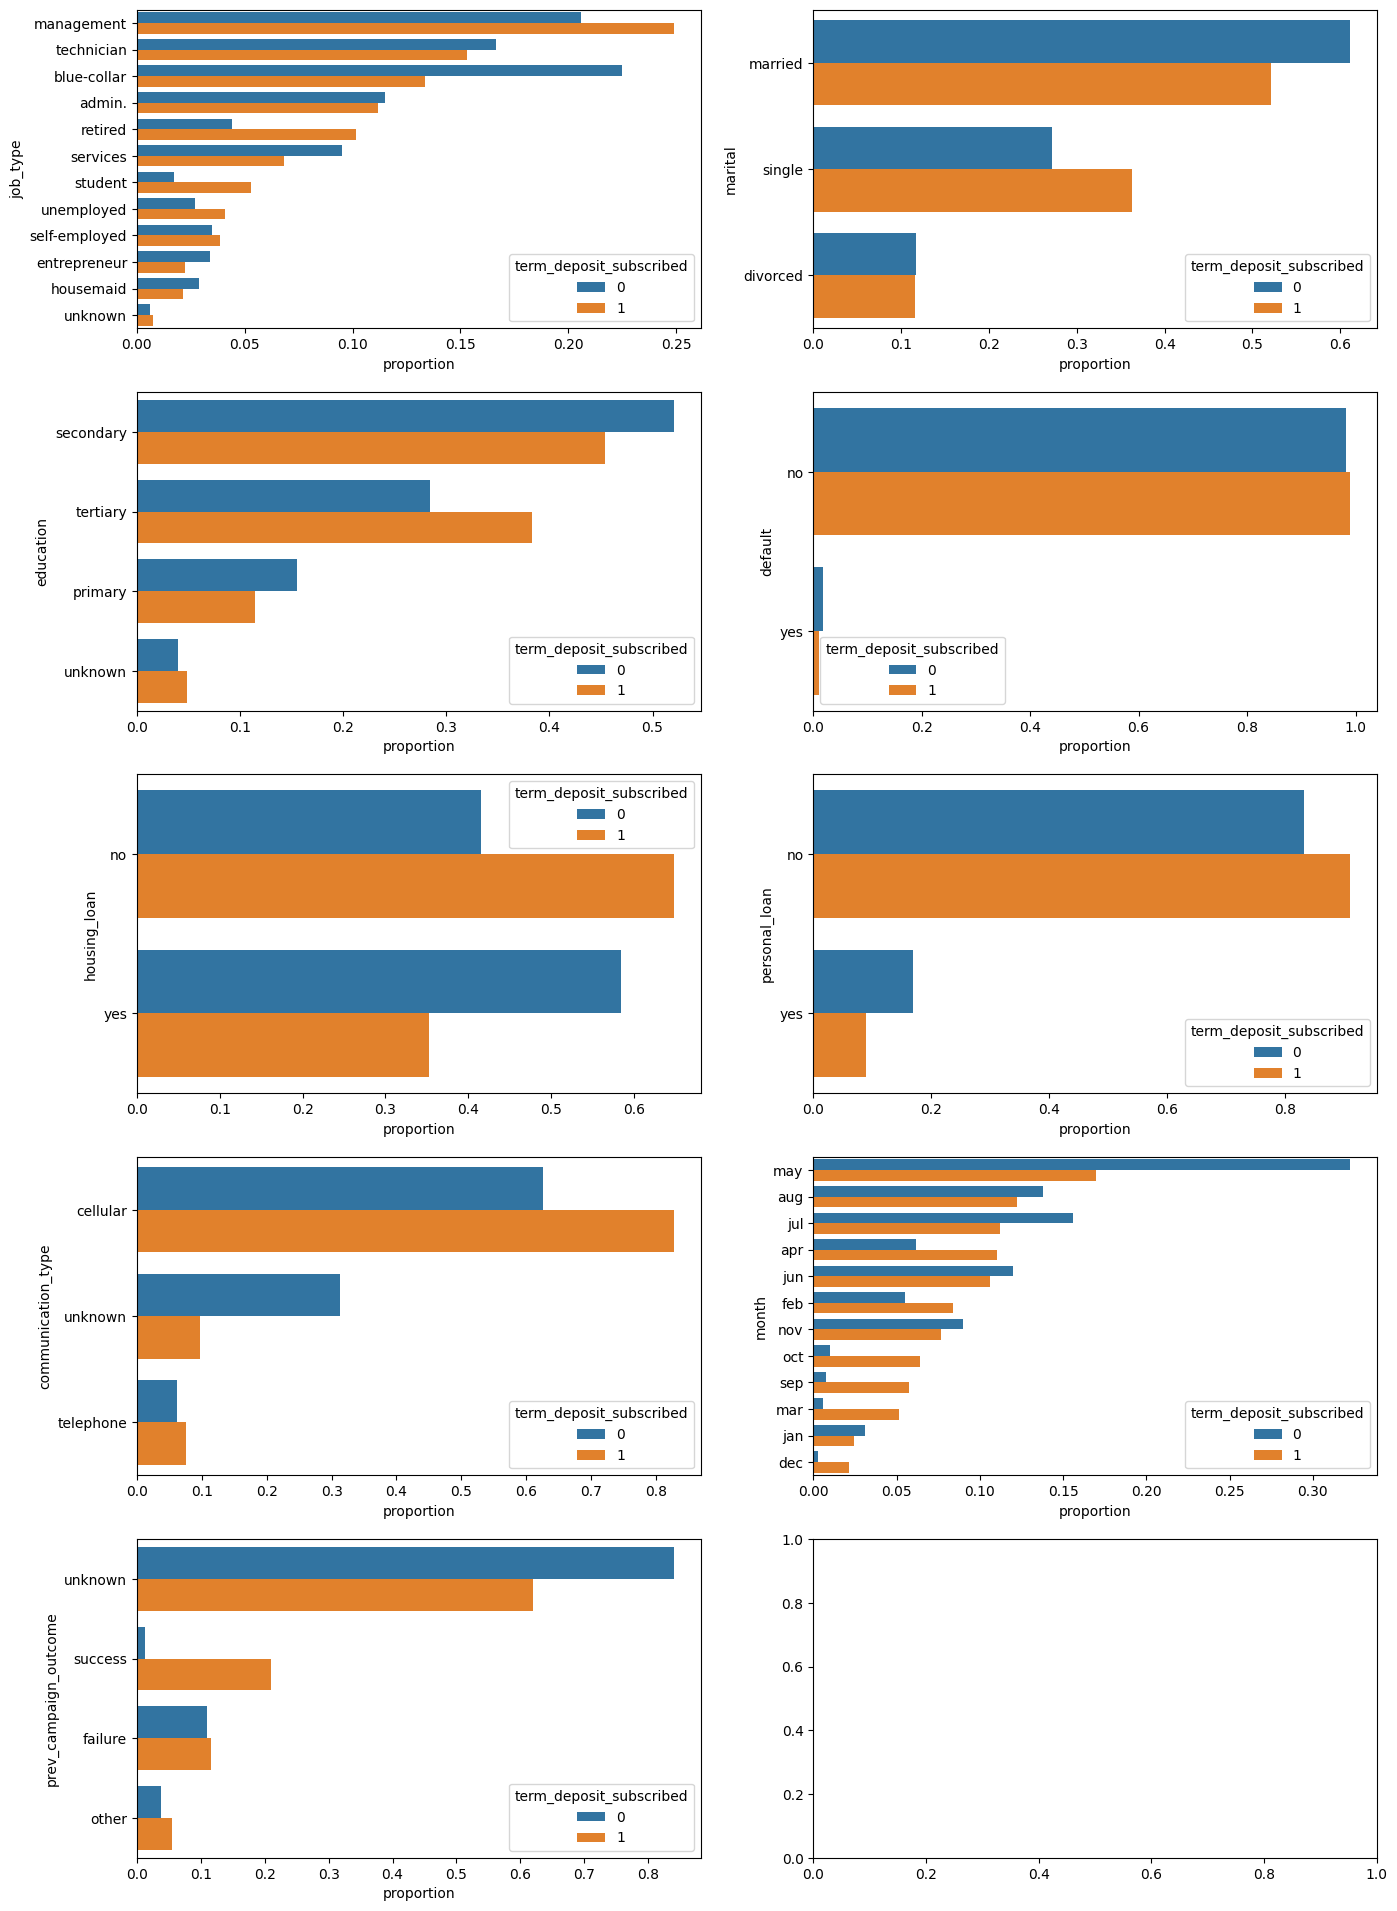

In [66]:
figure, axes = plt.subplots(5, 2, figsize = (16, 24))

# generate 10*1 array from 5*2
axes = [axis for axes_rows in axes for axis in axes_rows]

target_column = "term_deposit_subscribed"

for i, column in enumerate(data[categorical_columns]):
  subscribe_filter = data[target_column] == 1

  subscribe_data = data[subscribe_filter][column].value_counts(normalize = True).reset_index()

  no_subscribe_data = data[~subscribe_filter][column].value_counts(normalize = True).reset_index()

  subscribe_data[target_column] = 1
  no_subscribe_data[target_column] = 0

  # print(subscribe_data)
  # print(no_subscribe_data)

  column_data = pd.concat([ subscribe_data, no_subscribe_data]).reset_index(drop = True)

  sns.barplot(data = column_data, x = "proportion", y = column, hue = target_column, ax = axes[i])

##### Get numeric categorical

In [67]:
features = [column for column in data.columns if column not in ["id", "term_deposit_subscribed"]]

numeric_columns = [column for column in features if column not in categorical_columns]

numeric_columns

['customer_age',
 'balance',
 'day_of_month',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'days_since_prev_campaign_contact',
 'num_contacts_prev_campaign']

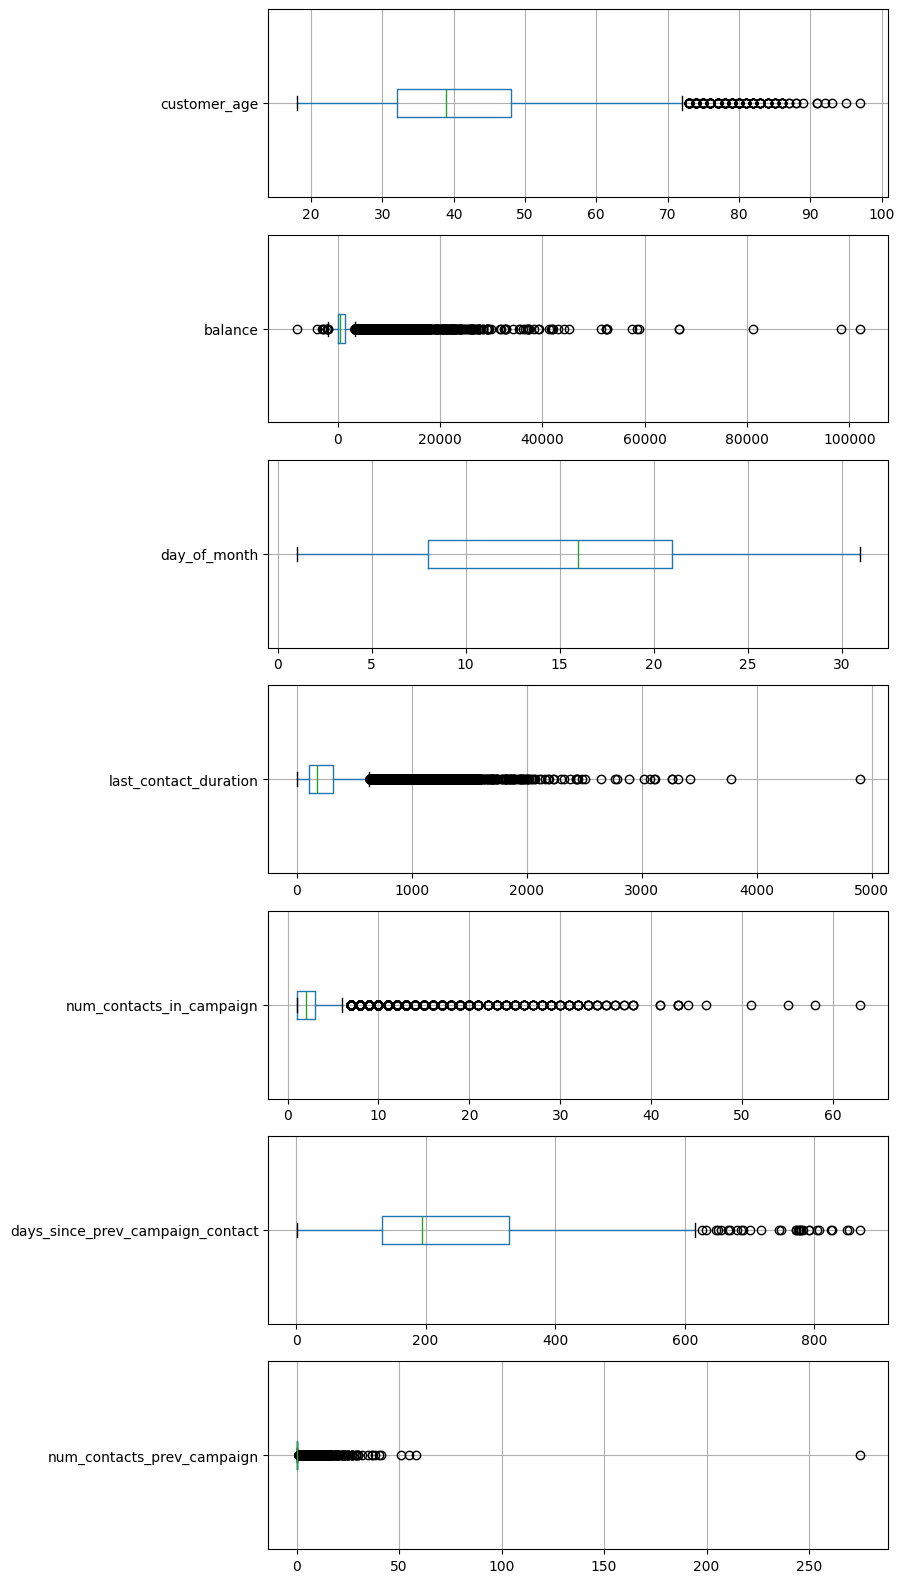

In [68]:
figure, axes = plt.subplots(7, 1, figsize = (8, 20))

for i, column in enumerate(data[numeric_columns]):
  data[[column]].boxplot(ax = axes[i], vert = False)

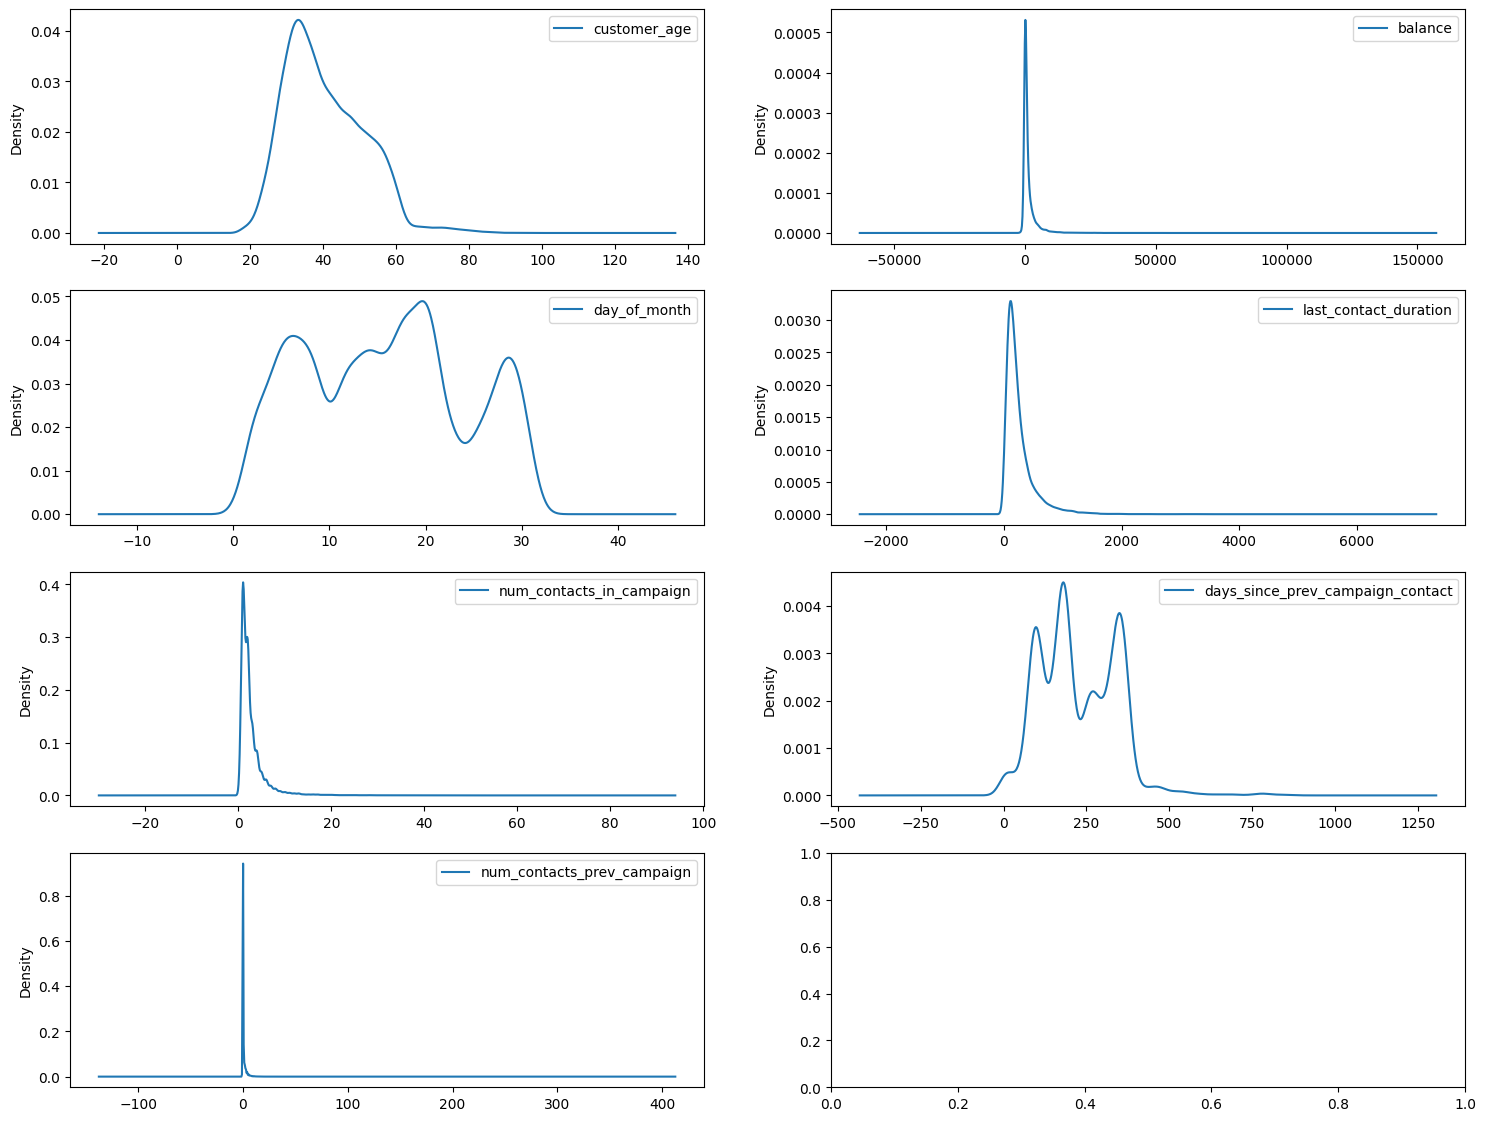

In [70]:
figure, axes = plt.subplots(4, 2, figsize = (18, 14))

axes = [axis for axes_rows in axes for axis in axes_rows]

for i, column in enumerate(numeric_columns):
  data[[column]].plot(kind = "kde", ax = axes[i])

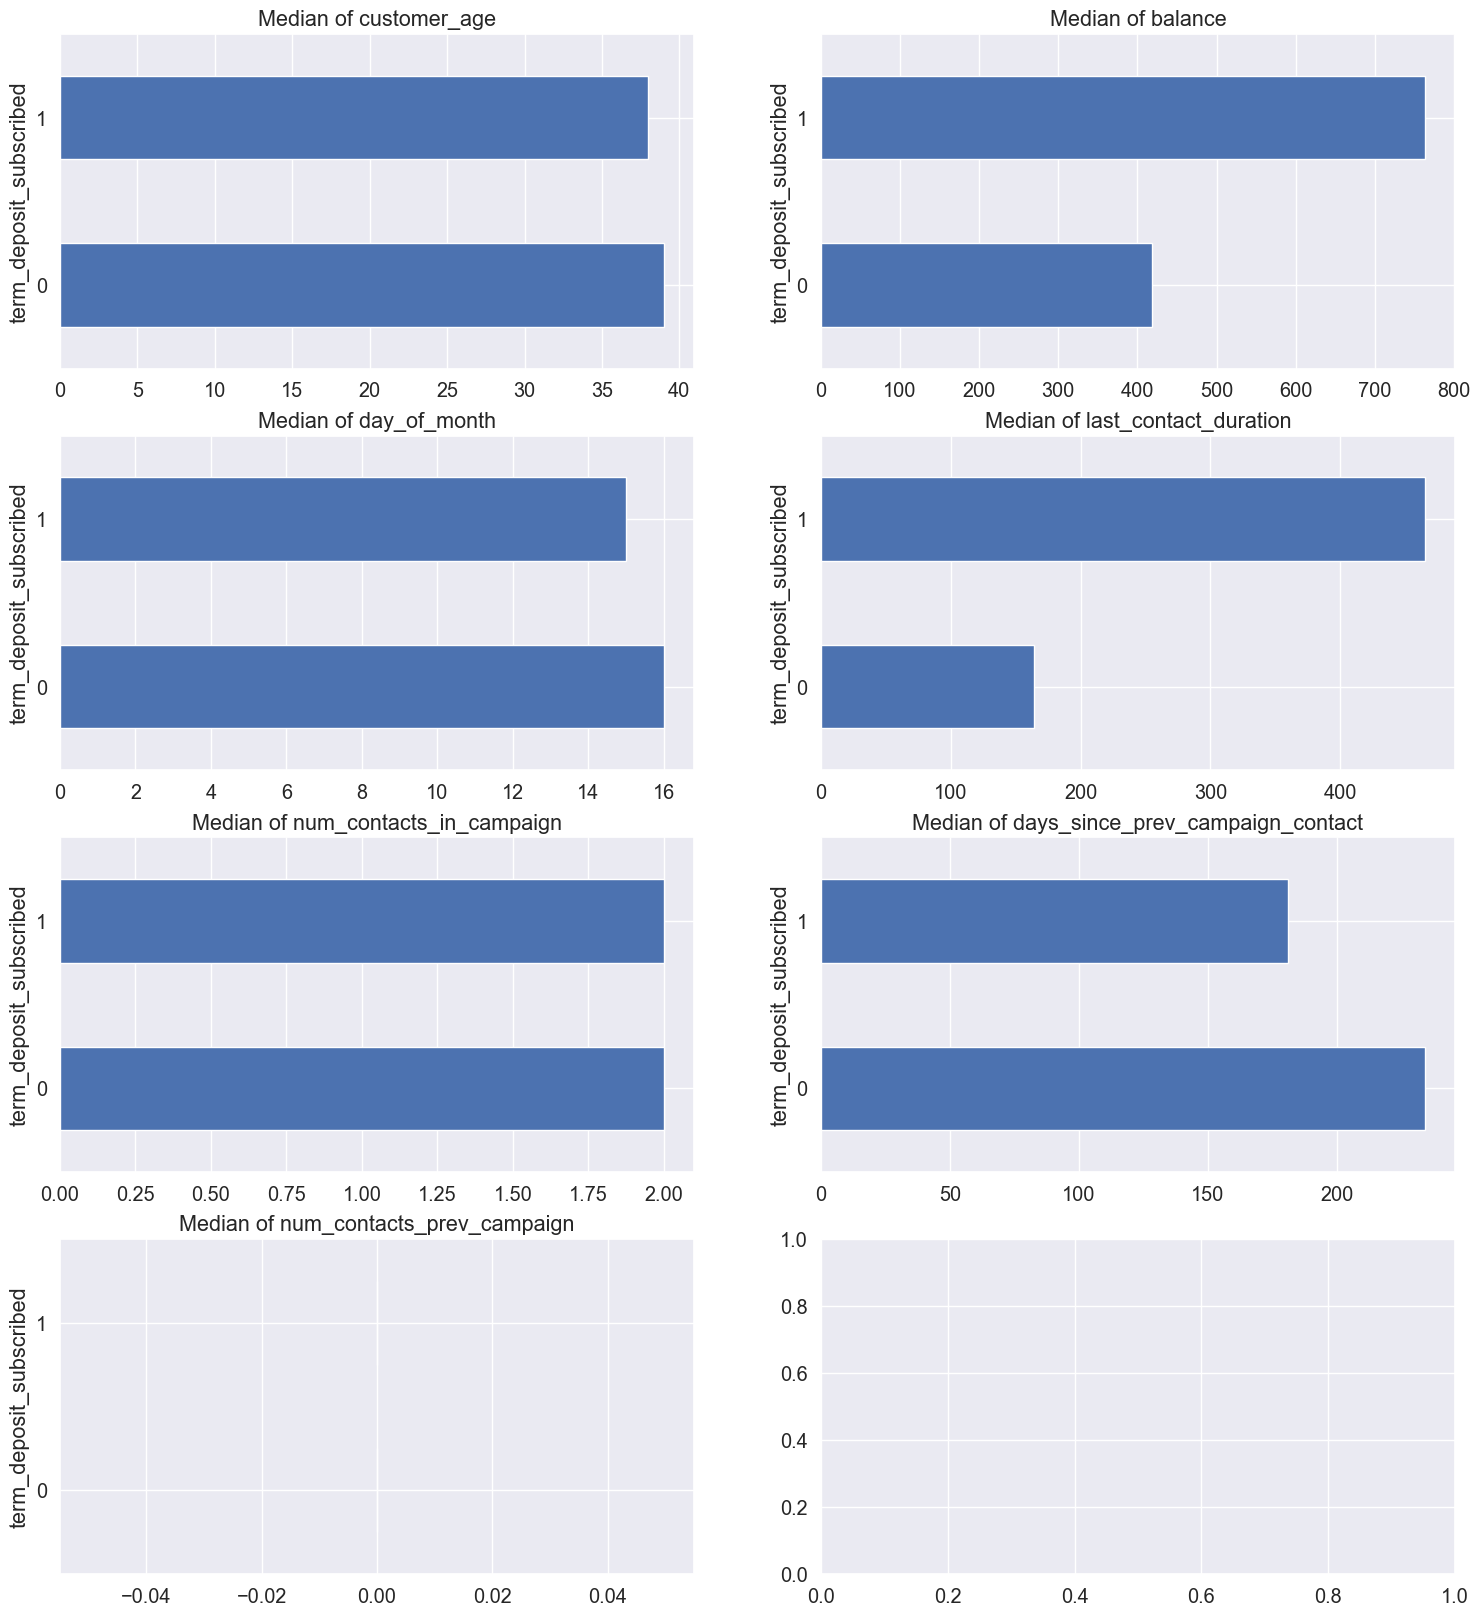

In [71]:
sns.set_theme(font_scale = 1.3)

figure, axes = plt.subplots(4, 2, figsize = (18, 20))
axes = [axis for axes_rows in axes for axis in axes_rows]

target_column = "term_deposit_subscribed"

for i, column in enumerate(numeric_columns):
  data.groupby(target_column)[column].median().plot(kind = "barh", title = f"Median of {column}", ax = axes[i])

<Axes: title={'center': 'Probability of subscribing to a term deposit'}, ylabel='is_old'>

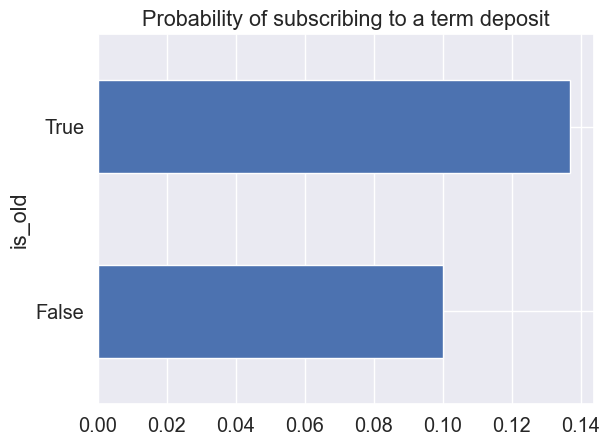

In [76]:
data["is_old"] = np.where(data["customer_age"] > 50, True, False)

data.groupby("is_old")[target_column].mean().sort_values().plot(kind = "barh", title = "Probability of subscribing to a term deposit")